Accuracy on validation set: 0.8222
Accuracy on validation set: 0.8222
Precision on validation set: 0.8232
Recall on validation set: 0.8222
F1-score on validation set: 0.8223


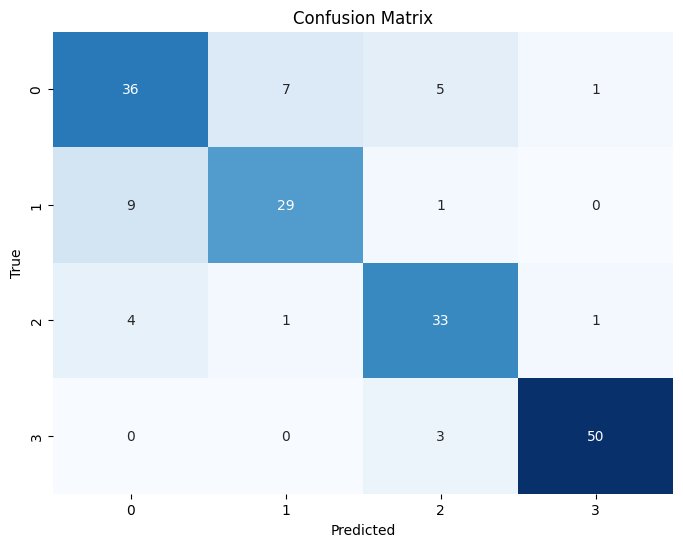

Classification Report:
              precision    recall  f1-score   support

      cloudy       0.73      0.73      0.73        49
        rain       0.78      0.74      0.76        39
       shine       0.79      0.85      0.81        39
     sunrise       0.96      0.94      0.95        53

    accuracy                           0.82       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.82      0.82      0.82       180



In [4]:
import os
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import cv2
import matplotlib.pyplot as plt

# Definisci le cartelle contenenti le immagini di training e test
train_dir = '../../datasets/dataset2/train/'
test_dir = '../../datasets/dataset2/test/'

# Definisci le classi e l'etichetta numerica corrispondente
classes = ['cloudy', 'rain', 'shine', 'sunrise']
label_dict = {i: classes[i] for i in range(len(classes))}

# Carica le immagini di training
X_train = []
y_train = []
for i, cls in enumerate(classes):
    for img_file in os.listdir(train_dir + cls):
        img = cv2.imread(os.path.join(train_dir + cls + '/' + img_file))
        if img is not None:
            img_resized = cv2.resize(img, (64, 64))
            X_train.append(img_resized.flatten())
            y_train.append(i)

# Dividi il dataset di training in un subset di training e un subset di validazione
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Reshape the input data to have the appropriate dimensions
X_train = np.array(X_train).reshape(-1, 64*64*3)
X_val = np.array(X_val).reshape(-1, 64*64*3)


# Addestra un modello SVM lineare
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

# Valuta le prestazioni del modello sul dataset di validazione
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation set: {accuracy:.4f}")

# Carica le immagini di test
X_test = []
for i, cls in enumerate(classes):
    for img_file in os.listdir(test_dir + cls):
        img = cv2.imread(os.path.join(test_dir + cls + '/' + img_file))
        if img is not None:
            img_resized = cv2.resize(img, (64, 64))
            X_test.append(img_resized.flatten())


# Fai le previsioni sul dataset di test
y_test = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy on validation set: {accuracy:.4f}")
print(f"Precision on validation set: {precision:.4f}")
print(f"Recall on validation set: {recall:.4f}")
print(f"F1-score on validation set: {f1:.4f}")

# Create a confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate a classification report
class_names = list(label_dict.values())
report = classification_report(y_val, y_pred, target_names=class_names)

# Print the classification report
print('Classification Report:')
print(report)
